In [21]:
## input dynamic W,H
import joblib
import numpy as np
from collections import Counter
import heapq
import pickle
import pandas as pd
num_topics = 670
years = 12
path_dyn = 'out/dynamictopics_k'+str(num_topics)+'.pkl'

### 1. Read
def load_nmf_results( in_path ):
	(doc_ids, terms, term_rankings, partition, W, H, labels) = joblib.load( in_path )
	return (doc_ids, terms, term_rankings, partition, W, H, labels)

(doc_ids, terms, term_rankings, partition, W, H, labels) = load_nmf_results(path_dyn)

with open('data/embeddings.npy','rb') as f:
    embed = np.load(f,allow_pickle=True)
with open('data/vocabulary.pkl','rb') as f:
    vocab = pickle.load(f)

# 2. 词典转换
vocalist = list(vocab.keys())
df = pd.DataFrame(data = H, 
                  columns = terms)
Hre = df[vocalist].to_numpy()

# 3. 求逆矩阵，解新W
B = np.linalg.pinv(Hre)
Wli = []
for i in range(years):
    W_ = np.matmul(embed[i].toarray(),B)
    Wli.append(W_)

# 4. get partition
def generate_partition(W):
    return np.argmax( W, axis = 1 ).flatten().tolist()
    ## 可进一步改进

def generate_partition2(W):
    tot = [0]*num_topics
    W[W < 0.0368] = 0
    for w in W:
        nlar = heapq.nlargest(5, enumerate(w), key=lambda x: x[1])
        if nlar[0][1] == 0:
            continue
        else:
            delt = [(nlar[0][1] - nlar[i+1][1]) for i in range(4)]
            adli = [nlar[0]]#[nlar[0][0]]
            for i in range(4):
                d = delt[i]
                if d<0.0274:
                    adli.append(nlar[i+1])
            s = sum([a[1] for a in adli])
            for a in adli:
                tot[a[0]] += a[1]/s#1/len(adli)
    return [round(t) for t in tot]

def time_topic(dicw):
    dic = dict.fromkeys(range(num_topics),0)
    for k in dicw.keys():
        dic[k] = dicw[k]
    return dic


''''
for i in range(years):
    par = generate_partition(Wli[i])
    dicw = Counter(par)
    dicw = time_topic(dicw)
    tot[i+2006] = dicw
'''



"'\nfor i in range(years):\n    par = generate_partition(Wli[i])\n    dicw = Counter(par)\n    dicw = time_topic(dicw)\n    tot[i+2006] = dicw\n"

In [96]:
def generate_partition2(W):
    tot = [0]*num_topics
    W[W < 0.0368] = 0
    for w in W:
        nlar = heapq.nlargest(5, enumerate(w), key=lambda x: x[1])
        if nlar[0][1] == 0:
            continue
        else:
            delt = [(nlar[0][1] - nlar[i+1][1]) for i in range(4)]
            adli = [nlar[0]]#[nlar[0][0]]
            for i in range(4):
                d = delt[i]
                if d<0.0274:
                    adli.append(nlar[i+1])
            s = sum([a[1] for a in adli])
            for a in adli:
                tot[a[0]] += a[1]/s#1/len(adli)
    return [round(t) for t in tot]

In [93]:
val = generate_partition2(Wli[2][10:11])

[(28, 0.1668241614494937), (551, 0.15748354718254606), (549, 0.08213359636302987), (169, 0.06731369659712823), (438, 0.05966110269242113)]
[(28, 0.1668241614494937), (551, 0.15748354718254606)]
28 0.5144008514419026
551 0.4855991485580975


In [3]:
import numpy as np
wn = np.load('res/Wn.npy',allow_pickle=True)
wn

array([array([[0.        , 0.06034768, 0.        , ..., 0.        , 0.        ,
               0.        ],
              [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
               0.        ],
              [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
               0.        ],
              ...,
              [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
               0.        ],
              [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
               0.        ],
              [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
               0.        ]])                                                   ,
       array([[0., 0., 0., ..., 0., 0., 0.],
              [0., 0., 0., ..., 0., 0., 0.],
              [0., 0., 0., ..., 0., 0., 0.],
              ...,
              [0., 0., 0., ..., 0., 0., 0.],
              [0., 0., 0., ..., 0., 0., 0.],
              [0., 0., 0., ..., 0., 

In [6]:
wn[2].shape

(16068, 670)

In [10]:
import gc
#del wn
gc.collect()

255

In [74]:
adli = [1,3,8,4]
s = sum(adli)
for a in adli:
    print(a/s)

0.0625
0.1875
0.5
0.25


In [22]:
tot = {}
for y in range(years):
    par = generate_partition2(Wli[y])
    d1 = {}
    for i in range(num_topics):
        d1[i] = par[i]
    tot[y+2006] = d1

totdf = pd.DataFrame(data = tot)
totdf.to_csv("res/tot.csv")
np.save("res/Wn.npy",Wli)
    #res2 = dict(sorted(dicw.items(), key = itemgetter(1), reverse = True)[:])
    #res2
    ## return : pandas

In [ ]:
import heapq

In [97]:
#Wli[0][300]#.shape
heapq.nlargest(10,enumerate(Wli[2][10]),key=lambda x:x[1])

[(28, 0.1668241614494937),
 (551, 0.15748354718254606),
 (549, 0.08213359636302987),
 (169, 0.06731369659712823),
 (438, 0.05966110269242113),
 (561, 0.0564055403124255),
 (187, 0.05503266166654237),
 (660, 0.05366729613110649),
 (49, 0.053348667678575365),
 (464, 0.048452184125500626)]

In [100]:
topterm['D550']

0                   motion
1            motion vector
2        motion estimation
3          motion analysis
4             motion model
5         motion parameter
6            global motion
7          estimate motion
8         motion detection
9           motion pattern
10      motion information
11       motion compensate
12            local motion
13              new motion
14              compensate
15           translational
16           stabilization
17               kinematic
18      motion recognition
19    translational motion
20                    clip
21         generate motion
22           result motion
23                 planner
24           motion object
25          spatiotemporal
26                 similar
27            motion video
28                  affine
29            image motion
30                parallax
31        algorithm motion
32         motion estimate
33              rotational
34            motion image
35            frame motion
36                velocity
3

In [24]:
totdf

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,0,0,0,0,0,0,0,0,0,0,0
1,71,76,96,89,113,110,110,121,118,136,120,113
2,0,0,0,0,0,0,0,0,0,0,0,0
3,7,1,3,4,4,10,9,8,9,16,10,13
4,44,37,40,44,58,33,39,38,32,21,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...
665,24,21,28,43,39,53,69,80,63,63,72,64
666,9,10,25,31,33,38,42,38,66,70,58,55
667,19,23,19,15,20,19,25,9,16,14,13,11
668,3,5,3,6,6,8,12,12,7,12,5,8


In [25]:
df2 = totdf.sum(axis=1)
df2

0         0
1      1273
2         0
3        94
4       426
       ... 
665     619
666     475
667     203
668      87
669     208
Length: 670, dtype: int64

In [26]:
df2.sort_values()

0         0
24        0
25        0
126       0
125       0
       ... 
398    3163
636    3329
580    3501
560    5412
549    5689
Length: 670, dtype: int64

In [59]:
len(df2[df2<1000])

631

In [43]:
df3 = df2[df2<1000]

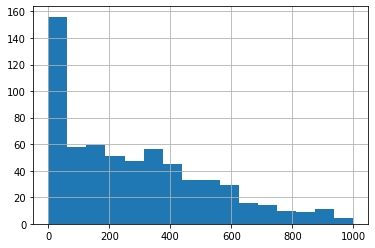

In [45]:
df3.hist(bins=16)

In [58]:
totdf.iloc[4]

2006    44
2007    37
2008    40
2009    44
2010    58
2011    33
2012    39
2013    38
2014    32
2015    21
2016    20
2017    20
Name: 4, dtype: int64

In [50]:
topterm = pd.read_csv("dynamictopics_k670_top50_terms.csv")
topterm

,Rank,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,D661,D662,D663,D664,D665,D666,D667,D668,D669,D670
0,1,pattern,segmentation,facial,block,neural,blood,3d face,robot,map,...,cloud,slam,content,action recognition,skeleton,stimulus,gait,skin,aperture,slam
1,2,pattern recognition,segmentation algorithm,facial feature,image block,neural network,blood vessel,face,team,depth map,...,sky,simultaneous,video content,human action,thinning,bci,gait recognition,skin color,synthetic,localization mapping
2,3,motion pattern,segmentation result,facial image,block matching,network,blood flow,face model,robot system,saliency map,...,service,localization mapping,image content,human action recognition,skeletonization,response,walk,human skin,synthetic aperture,simultaneous
3,4,repetitive,object segmentation,3d facial,block artifact,artificial,pressure,3d face recognition,robot control,map image,...,landsat,simultaneous localization,multimedia,action,branch,ssvep,human gait,skin detection,aperture radar,simultaneous localization
4,5,image pattern,segmentation technique,facial animation,block size,artificial neural,velocity,3d face model,service,map generation,...,atmospheric,simultaneous localization mapping,content analysis,recognition,medial,potential,gait analysis,face detection,synthetic aperture radar,simultaneous localization mapping
5,6,pattern image,automatic segmentation,facial action,block-based,artificial neural network,pulse,3d,robot vision,3d map,...,mask,mapping slam,visual content,spatio-temporal,topology,brain-computer,walking,color segmentation,aperture radar sar,mapping slam
6,7,repeat,result,facial expression,divide,neuron,smear,database,kinematic,digital map,...,cloud computing,localization mapping slam,adaptation,kth,medial axis,brain-computer interface,gait feature,color model,radar sar,localization mapping slam
7,8,pattern matching,segmentation process,facial motion,forgery,train,wave,face database,robot navigation,map generate,...,thin,visual slam,multimedia content,recognition video,skeletal,evoke,silhouette,fake,letter,slam algorithm
8,9,structured,motion segmentation,facial landmark,partition,ann,doppler,icp,soccer,map paper,...,computing,monocular,medium,interest point,axis,stimulation,foot,muscle,isar,slam problem
9,10,spatial pattern,video segmentation,mouth,block motion,bp,arterial,face recognition,equip,map obtain,...,gaming,slam system,movie,viewpoint,compute,evoke potential,cycle,tone,interferometric,monocular
